Равномерное распределение:
Аналитическое решение =  8.833333333333334
Решение с помощью биномиального распределения = 8.839
Погрешность =  0.0005919258549527631


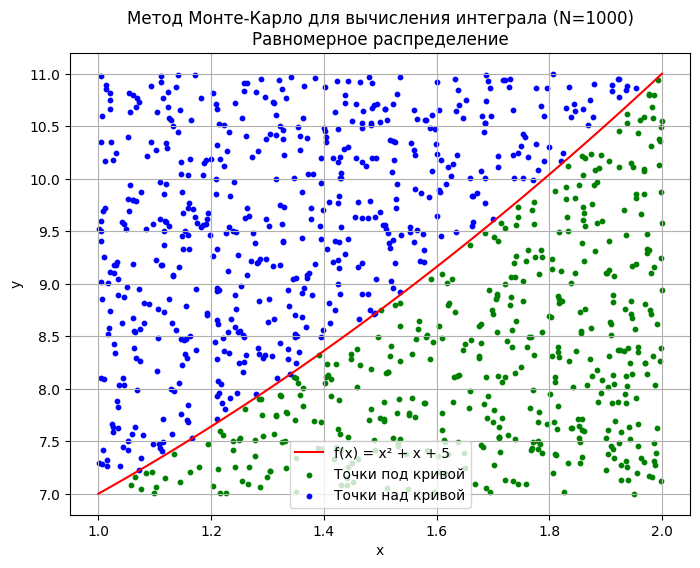

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Параметры
a, b = 1, 2  # Границы интегрирования
f_min, f_max = 7, 11  # Минимальное и максимальное значение функции
N_values = [10, 20, 40, 80, 160, 320, 640, 1280, 2560, 5120, 10240, 20480, 40960, 81920, 163840, 327680, 655360]

# Функция
def f(x):
    return x**2 + x + 5

# Точное значение интеграла
exact_integral = 53 / 6  # 8.8333...

# Функция для метода Монте-Карло с равномерным распределением
def monte_carlo_uniform(N):
    x = np.random.uniform(a, b, N)
    y = np.random.uniform(f_min, f_max, N)
    below_curve = y <= f(x)
    points_below = np.sum(below_curve)
    area = (b - a) * (points_below / N) * (f_max - f_min) + (b - a) * f_min
    return points_below, area, x, y, below_curve

print("Равномерное распределение:")
# print("N\t\tТочек под кривой\tЗначение интеграла")
uniform_results = []
for N in N_values:
    points_below, area, _, _, _ = monte_carlo_uniform(N)
    uniform_results.append((N, points_below, area))
    # print(f"{N}\t\t{points_below}\t\t\t{area:.3f}")

# Среднее значение для N=655360
uniform_avg = uniform_results[-1][2]
# print(f"\nСреднее значение интеграла (равномерное): {uniform_avg:.3f}")
# print(f"Разница между значениями интеграла: {abs(uniform_avg - binomial_avg):.3f}")

# График для равномерного распределения (N=1000)
N_plot = 1000
points_below, _, x_points, y_points, below_curve = monte_carlo_uniform(N_plot)
plt.figure(figsize=(8, 6))
x_curve = np.linspace(a, b, 100)
y_curve = f(x_curve)
plt.plot(x_curve, y_curve, 'r-', label='f(x) = x² + x + 5')
plt.scatter(x_points[below_curve], y_points[below_curve], color='green', s=10, label='Точки под кривой')
plt.scatter(x_points[~below_curve], y_points[~below_curve], color='blue', s=10, label='Точки над кривой')
plt.title('Метод Монте-Карло для вычисления интеграла (N=1000)\nРавномерное распределение')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
# plt.savefig('monte_carlo_uniform.png')

# Выводим результаты
print("Аналитическое решение = ", exact_integral)
print(f"Решение с помощью биномиального распределения = {uniform_avg:.3f}", )
print("Погрешность = ", abs((exact_integral -  uniform_avg) / exact_integral))



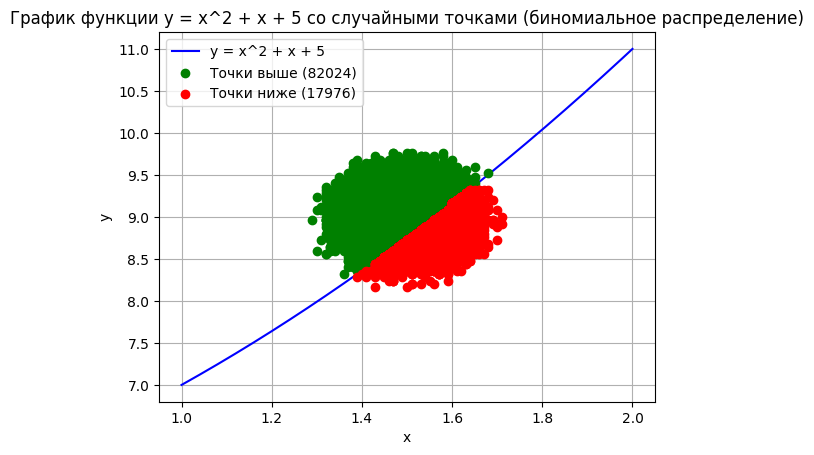

Аналитическое решение =  8.833333333333334
Решение с помощью биномиального распределения =  0.71904
Погрешность =  0.918599245283019


In [20]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom  # Импортируем биномиальное распределение

# Определяем функцию
def f(x):
    return x**2 + x + 5

# Параметры
a = 1
b = 2
n_points = 100000  # Количество случайных точек
n_trials = 100  # Количество испытаний для биномиального распределения
p = 0.5  # Вероятность успеха

# Создаем массив значений x для гладкого графика
x_smooth = np.linspace(a, b, 400)
y_smooth = f(x_smooth)

# Генерируем случайные точки с помощью биномиального распределения
x_binom = binom.rvs(n_trials, p, size=n_points)  # Биномиальное распределение для x
y_binom = binom.rvs(n_trials, p, size=n_points)  # Биномиальное распределение для y

# Масштабируем точки в диапазон [a, b] для x и [f(a), f(b)] для y
x_random = a + (x_binom / n_trials) * (b - a)
y_random = f(a) + (y_binom / n_trials) * (f(b) - f(a))

# Определяем, какие точки выше графика, а какие ниже
above = y_random > f(x_random)  # Точки выше графика
below = y_random <= f(x_random)  # Точки ниже графика

# Считаем количество точек каждого типа
nad = np.sum(above)
pod = np.sum(below)

# Создаем график
plt.plot(x_smooth, y_smooth, label='y = x^2 + x + 5', color='blue')  # Гладкий график функции
plt.scatter(x_random[above], y_random[above], color='green', label=f'Точки выше ({nad})', zorder=5)  # Точки выше графика
plt.scatter(x_random[below], y_random[below], color='red', label=f'Точки ниже ({pod})', zorder=5)  # Точки ниже графика

# Добавляем подписи
plt.xlabel('x')
plt.ylabel('y')
plt.title('График функции y = x^2 + x + 5 со случайными точками (биномиальное распределение)')
plt.grid(True)  # Добавляем сетку
plt.legend()  # Добавляем легенду

# Вычисляем площадь методом Монте-Карло
total_area = (b - a) * (f(b) - f(a))  # Площадь прямоугольника
ravnom = total_area * (pod / n_points)  # Приближённая площадь под кривой

# Аналитическое решение интеграла
analit = 53 / 6 

# Показываем график
plt.show()

# Выводим результаты
print("Аналитическое решение = ", analit)
print("Решение с помощью биномиального распределения = ", ravnom)
print("Погрешность = ", abs((analit - ravnom) / analit))

In [2]:
# подключаем модуль случайных чисел
import random
 
# функция, которая посчитает число пи
def count_pi(n):
	# общее количество бросков
    i = 0
	# сколько из них попало в круг
    count = 0
    # пока мы не дошли до финального броска
    while i < n:
        # случайным образом получаем координаты x и y
        x = random.random()
        y = random.random()
        # проверяем, попали мы в круг или нет
        if (pow(x, 2) + pow(y, 2)) < 1:
			# если попали — увеличиваем счётчик на 1
            count += 1
		# в любом случае увеличиваем общий счётчик
        i += 1
    # считаем и возвращаем число пи
    print(count)
    return 4 * (count / n)
 
# запускаем функцию
pi = count_pi(1000000)
# выводим результат
print(pi)

785019
3.140076


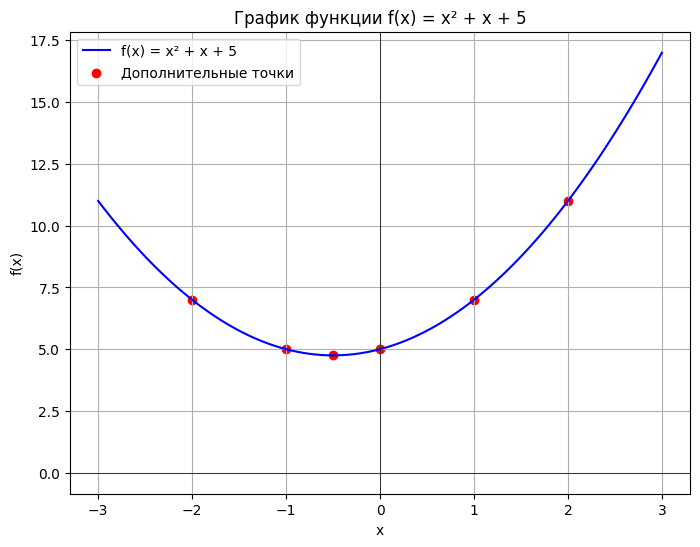

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Определяем функцию
def f(x):
    return x**2 + x + 5

# Создаём массив точек для графика
x = np.linspace(-3, 3, 100)
y = f(x)

# Построение графика
plt.figure(figsize=(8, 6))
plt.plot(x, y, label='f(x) = x² + x + 5', color='blue')
plt.scatter([-2, -1, -0.5, 0, 1, 2], [7, 5, 4.75, 5, 7, 11], color='red', label='Дополнительные точки')
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.grid(True)
plt.title('График функции f(x) = x² + x + 5')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.savefig('function_graph.png')